#### IMPORTING THE DATASET

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv("Train.csv")
train_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3.0,0.0,"O'Donoghue, Ms. Bridget",female,NaN,0.0,0.0,364856,7.750,NaN,Q,NaN,NaN,NaN
1,2.0,0.0,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0.0,0.0,250655,26.000,NaN,S,NaN,NaN,NaN
2,2.0,1.0,"Smith, Miss. Marion Elsie",female,40.0,0.0,0.0,31418,13.000,NaN,S,9,NaN,NaN
3,3.0,1.0,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1.0,1.0,363291,20.525,NaN,S,C D,NaN,"Strood, Kent, England Detroit, MI"
4,3.0,1.0,"McCoy, Miss. Agnes",female,NaN,2.0,0.0,367226,23.250,NaN,Q,16,NaN,NaN


In [3]:
train_data.shape

(1009, 14)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1009 non-null   float64
 1   survived   1009 non-null   float64
 2   name       1009 non-null   object 
 3   sex        1009 non-null   object 
 4   age        812 non-null    float64
 5   sibsp      1009 non-null   float64
 6   parch      1009 non-null   float64
 7   ticket     1009 non-null   object 
 8   fare       1008 non-null   float64
 9   cabin      229 non-null    object 
 10  embarked   1008 non-null   object 
 11  boat       374 non-null    object 
 12  body       98 non-null     float64
 13  home.dest  582 non-null    object 
dtypes: float64(7), object(7)
memory usage: 110.5+ KB


In [5]:
train_data.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          197
sibsp          0
parch          0
ticket         0
fare           1
cabin        780
embarked       1
boat         635
body         911
home.dest    427
dtype: int64

In [6]:
test_data = pd.read_csv("Test.csv")
test_data.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Flynn, Mr. John Irwin (""Irving"")",male,36.0,0.0,0.0,PC 17474,26.3875,E25,S,5,NaN,"Brooklyn, NY"
1,3.0,"Sage, Miss. Constance Gladys",female,NaN,8.0,2.0,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN
2,1.0,"Rood, Mr. Hugh Roscoe",male,NaN,0.0,0.0,113767,50.0000,A32,S,NaN,NaN,"Seattle, WA"
3,2.0,"Gillespie, Mr. William Henry",male,34.0,0.0,0.0,12233,13.0000,NaN,S,NaN,NaN,"Vancouver, BC"
4,2.0,"Collander, Mr. Erik Gustaf",male,28.0,0.0,0.0,248740,13.0000,NaN,S,NaN,NaN,"Helsinki, Finland Ashtabula, Ohio"


In [7]:
test_data.shape

(300, 13)

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     300 non-null    float64
 1   name       300 non-null    object 
 2   sex        300 non-null    object 
 3   age        234 non-null    float64
 4   sibsp      300 non-null    float64
 5   parch      300 non-null    float64
 6   ticket     300 non-null    object 
 7   fare       300 non-null    float64
 8   cabin      66 non-null     object 
 9   embarked   299 non-null    object 
 10  boat       112 non-null    object 
 11  body       23 non-null     float64
 12  home.dest  163 non-null    object 
dtypes: float64(6), object(7)
memory usage: 30.6+ KB


In [9]:
test_data.isnull().sum()

pclass         0
name           0
sex            0
age           66
sibsp          0
parch          0
ticket         0
fare           0
cabin        234
embarked       1
boat         188
body         277
home.dest    137
dtype: int64

#### DROPPING UN-IMPORTANT FEATURES

In [10]:
columns_to_drop = ['body' , 'home.dest' , 'boat' , 'embarked' , 'name' , 'cabin' , 'ticket']

train_data = train_data.drop(columns_to_drop , axis=1)
test_data = test_data.drop(columns_to_drop , axis=1)

print(train_data.shape , test_data.shape)

(1009, 7) (300, 6)


In [11]:
train_data.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,3.0,0.0,female,NaN,0.0,0.0,7.750
1,2.0,0.0,male,39.0,0.0,0.0,26.000
2,2.0,1.0,female,40.0,0.0,0.0,13.000
3,3.0,1.0,female,31.0,1.0,1.0,20.525
4,3.0,1.0,female,NaN,2.0,0.0,23.250


In [12]:
test_data.head()

,pclass,sex,age,sibsp,parch,fare
0,1.0,male,36.0,0.0,0.0,26.3875
1,3.0,female,NaN,8.0,2.0,69.5500
2,1.0,male,NaN,0.0,0.0,50.0000
3,2.0,male,34.0,0.0,0.0,13.0000
4,2.0,male,28.0,0.0,0.0,13.0000


#### FILLING MISSING VALUES

In [13]:
values = {'age':train_data['age'].mean() , 'fare':train_data['fare'].mean()}
train_data = train_data.fillna(value = values)

test_data = test_data.fillna(test_data['age'].mean())

In [14]:
train_data.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [15]:
test_data.isnull().sum()

pclass    0
sex       0
age       0
sibsp     0
parch     0
fare      0
dtype: int64

#### LABEL ENCODING

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
train_data['sex'] = le.fit_transform(train_data['sex'])
test_data['sex']=le.fit_transform(test_data['sex'])

In [18]:
train_data.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,3.0,0.0,0,29.838978,0.0,0.0,7.750
1,2.0,0.0,1,39.000000,0.0,0.0,26.000
2,2.0,1.0,0,40.000000,0.0,0.0,13.000
3,3.0,1.0,0,31.000000,1.0,1.0,20.525
4,3.0,1.0,0,29.838978,2.0,0.0,23.250


#### SPLITTING DATA INTO INPUT FEATURES/ATTRIBUTES AND OUTPUT/TARGET

In [19]:
input_cols = ['pclass' , 'sex' , 'age' , 'sibsp' , 'parch' , 'fare']
output_cols = ['survived']

x_train = train_data[input_cols]
y_train = train_data[output_cols]

print(x_train.shape , y_train.shape)

(1009, 6) (1009, 1)


#### DECISION TREE CLASSIFIER USING SK-LEARN

In [20]:
from sklearn.tree import DecisionTreeClassifier 

In [36]:
clf = DecisionTreeClassifier(criterion='entropy' , max_depth=5)

In [37]:
clf.fit(x_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
clf.score(x_train , y_train)

0.8275520317145689

In [39]:
y_predict = clf.predict(test_data)
print(y_predict)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [40]:
df_sklearn = pd.DataFrame(y_predict , columns = ["survived"])
df_sklearn.to_csv('y_predictions_sklearn.csv' , index_label="Id")

In [41]:
df_sklearn.head()

,survived
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


#### VISUALIZE DECISION TREE

In [42]:
import pydotplus
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image

In [43]:
dot_data = export_graphviz(clf, out_file=None, filled=True, rounded=True, feature_names=x_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('titanic-dt.pdf')

True

#### USING RANDOM FORESTS

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [45]:
acc_list = []
for i in range(1,50):
    acc = cross_val_score(RandomForestClassifier(n_estimators=i, criterion='entropy' , max_depth=5),x_train,np.array(y_train).reshape((-1,)),cv=5).mean()
    acc_list.append(acc)

In [46]:
print(max(acc_list))
print(np.argmax(acc_list))

0.8117197264906991
43


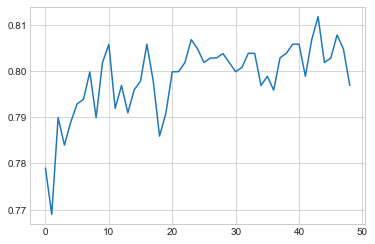

In [47]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(acc_list)
plt.show()

In [48]:
rf = RandomForestClassifier(n_estimators=43, criterion='entropy', max_depth=5)
rf.fit(x_train , np.array(y_train).reshape((-1,)))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=43, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
rf.score(x_train , np.array(y_train).reshape((-1,)))

0.8354806739345887

In [50]:
y_pred = rf.predict(test_data)

In [51]:
y_pred[:10]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [52]:
df_randomforest = pd.DataFrame(y_pred , columns = ['survived'])
df_randomforest.to_csv('y_predictions_using_RF.csv' , index_label = "Id")